In [49]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

In [50]:
import matplotlib.pyplot as plt

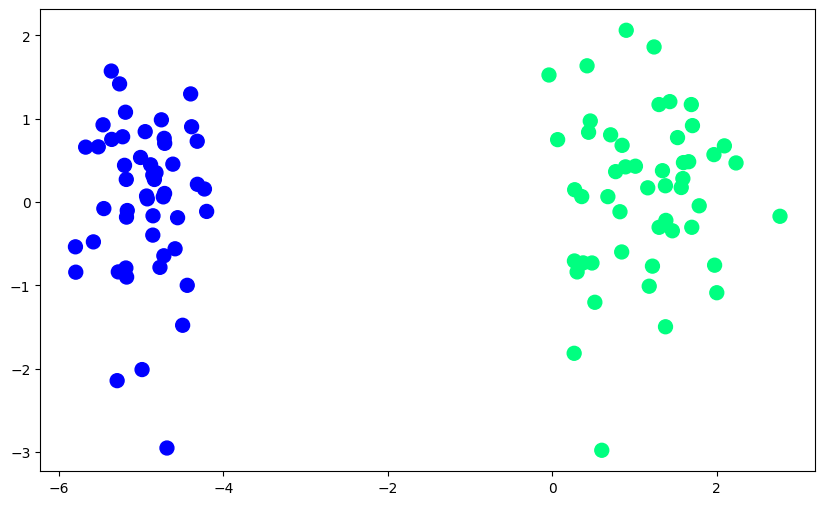

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [52]:
def perceptron(X, y):

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0], weights[1:]

In [53]:
def step(z):
    return 1 if z > 0 else 0

In [54]:
intercept_, coef_ = perceptron(X, y)

In [55]:
print(coef_)
print(intercept_)

[1.1204053  0.40381514]
1.2000000000000002


In [56]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [57]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 2.0)

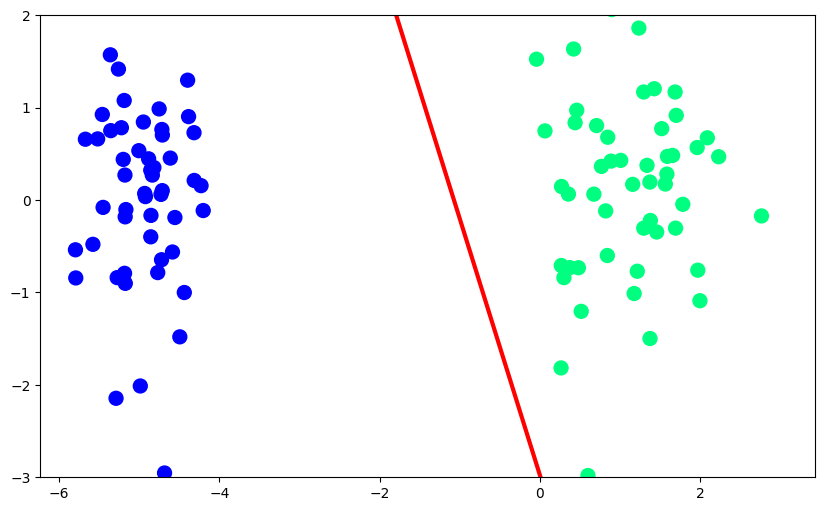

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

In [59]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [60]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [61]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m*x_input + b

(-3.0, 2.0)

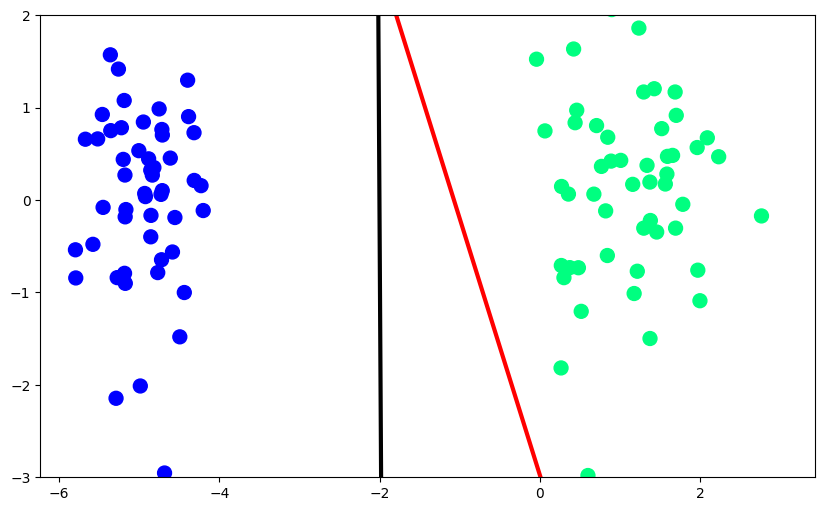

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

In [63]:
def perceptron(X, y):

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0], weights[1:]

In [64]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [65]:
intercept_, coef_ = perceptron(X, y)

In [66]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [67]:
x_input2 = np.linspace(-3, 3, 100)
y_input2 = m*x_input + b

(-3.0, 2.0)

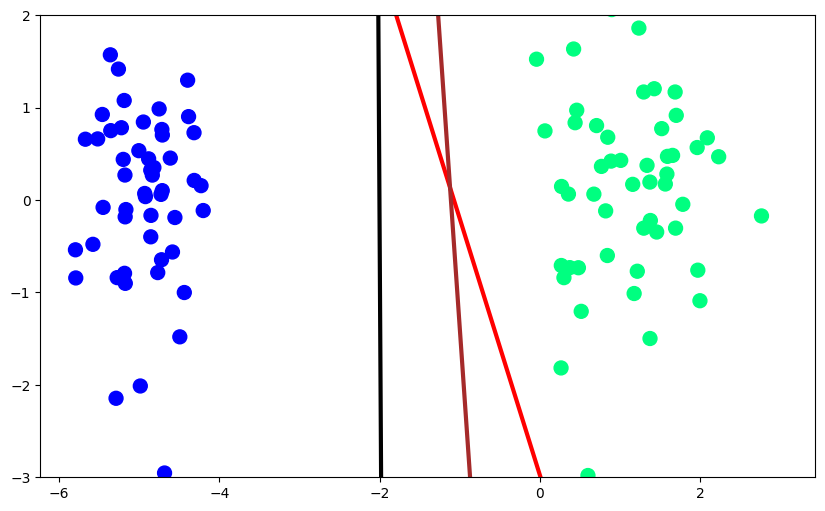

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.plot(x_input2, y_input2, color='brown', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

In [69]:
def perceptron(X, y):

    m = []
    b = []

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m, b

In [70]:
m, b = perceptron(X, y)

In [71]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

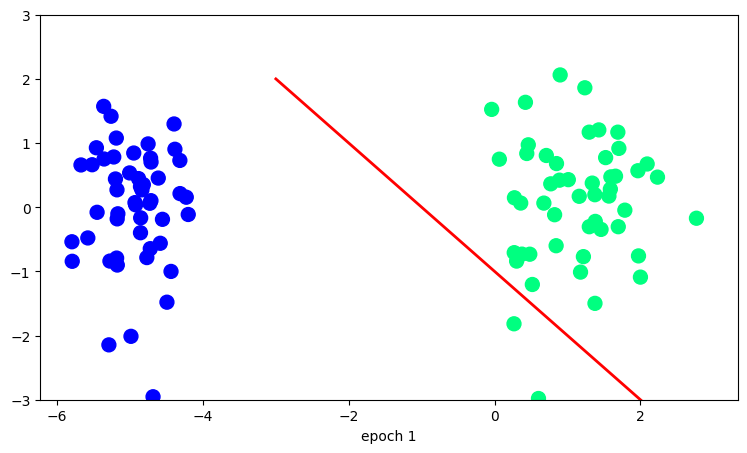

In [72]:
fig, ax = plt.subplots(figsize=(9, 5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] + b[0]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
line, = ax.plot(x_i, x_i*m[0] + b[0], 'r-', linewidth=2)
plt.ylim(-3, 3)


def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax


anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)